In [249]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as plotl
import plotly.graph_objs as go
import plotly.tools as tls
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('ggplot')
pd.set_option("display.max_rows", 2000)
#http://stackoverflow.com/questions/27504870/sklearn-kmeans-get-class-centroid-labels-and-reference-to-a-dataset
#http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/
#https://bespokeblog.wordpress.com/2011/07/07/basic-data-plotting-with-matplotlib-part-2-lines-points-formatting/

In [280]:
data_from_json = pd.read_json('prepped-wo-section.json')
data_to_frame = pd.DataFrame(data_from_json)
#data_to_frame = data_to_frame.fillna(-1)
data_to_frame.head(20)

,avg_incomplete,avg_score,avg_words_saved,num_words_saved,postId,user,video_vocab_count
0,0.000000,92.000000,0.104839,26,3913,50679,248
1,0.000000,93.333333,0.098039,15,5186,50679,153
2,0.000000,90.142857,0.165533,73,4974,50679,441
3,0.000000,90.166667,0.121673,32,4802,50679,263
4,0.000000,93.857143,0.104101,33,3711,50679,317
5,0.000000,92.000000,0.127820,17,5881,50679,133
6,0.333333,78.000000,0.138686,19,7126,50679,137
7,1.000000,NaN,0.142349,40,5797,50679,281
8,0.000000,82.200000,0.221774,55,3913,22808,248
9,0.000000,76.857143,0.293375,93,3711,22808,317


In [282]:
#consider sections?
data_to_frame['sequence_path_number'] = data_to_frame.groupby(['user']).cumcount()+1
#data_to_frame[['postId','user', 'sequence_path_number']]
data_to_frame.groupby('user').size().sort_values(ascending=[0])

user
123347      3
108850      3
99281       3
95937       3
116162      3
120753      3
119183      3
111166      3
102914      3
119100      3
125465      3
119571      3
126236      3
101654      3
127508      4
117860      4
117845      4
6940        4
125095      4
125048      4
124901      4
113829      4
53059       4
127910      4
103078      4
115608      4
101888      4
112967      4
52263       4
53075       4
74810       4
128195      4
91063       4
87559       4
127416      4
99452       4
119375      4
125863      4
120874      4
88662       4
110597      4
127031      4
118804      4
110603      4
98889       4
110165      4
126542      4
98754       4
119783      4
128983      4
84570       4
126899      4
74848       5
126709      5
60525       5
99852       5
123514      5
89471       5
90156       5
124030      5
127969      5
62981       5
90608       5
125608      5
111757      5
97694       5
97846       5
113223      5
112409      5
71607       5
101124      5
1

In [262]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=3)
data_to_frame = data_to_frame[data_to_frame['postId'] != 3913]
good_columns = data_to_frame[['avg_incomplete']] #data_to_frame._get_numeric_data()

# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_
data2D = kmeans_model.transform(good_columns)

# Create a PCA model.
#pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
#plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
#plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.

df_processed = data_to_frame.copy()
df_processed['Cluster_Class'] = pd.Series(labels, index=df_processed.index)
df_processed.groupby('user').size

<bound method DataFrameGroupBy.size of <pandas.core.groupby.DataFrameGroupBy object at 0x000000002EB61438>>

(51900L, 3L)


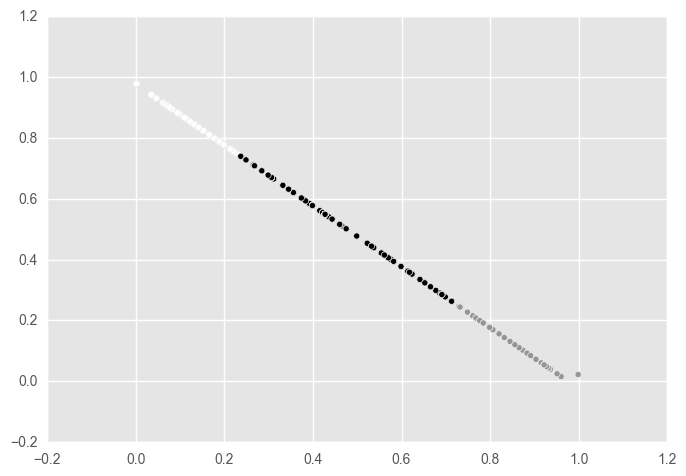

In [234]:
print data2D.shape
plt.scatter(data2D[:,0], data2D[:,1], c=labels)
    

Cluster_Class
0    46144
1     4187
2     1569
dtype: int64


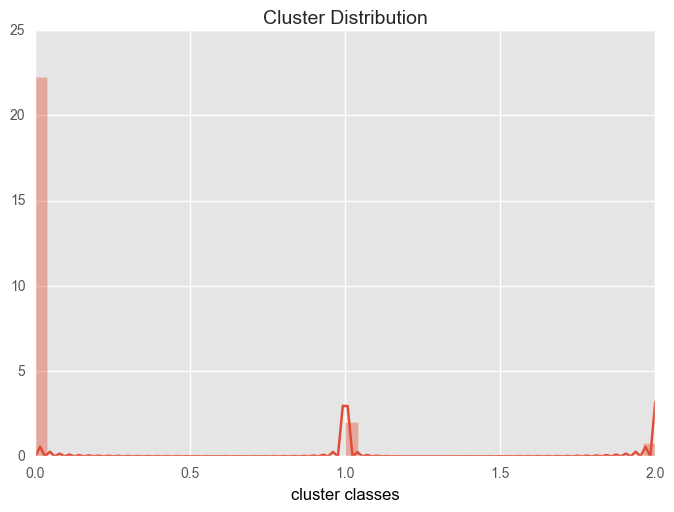

In [196]:
print df_processed.groupby(['Cluster_Class']).size()

c1 = sns.distplot(df_processed['Cluster_Class'])
c1.axes.set_title('Cluster Distribution', fontsize=14)
c1.set_xlabel("cluster classes",color="black")

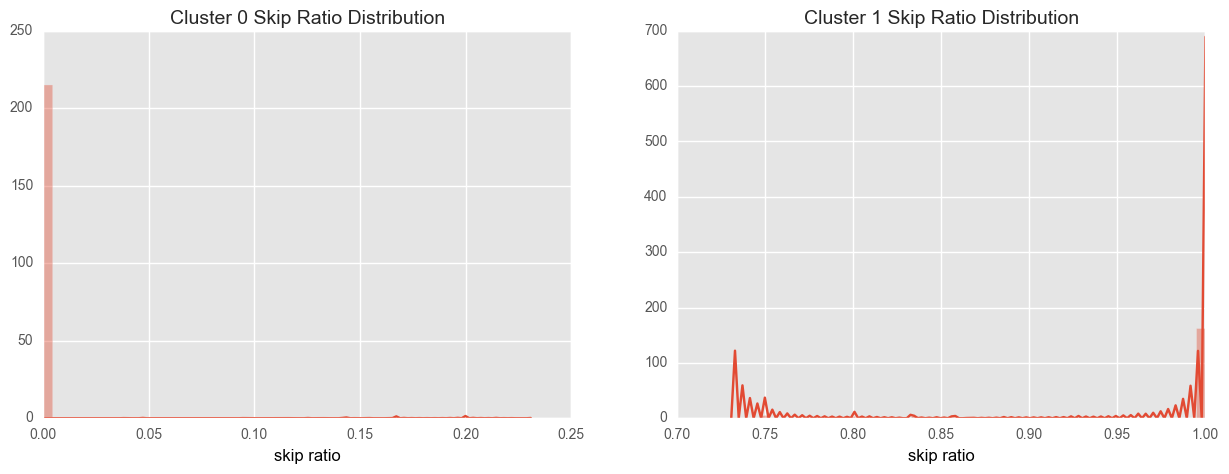

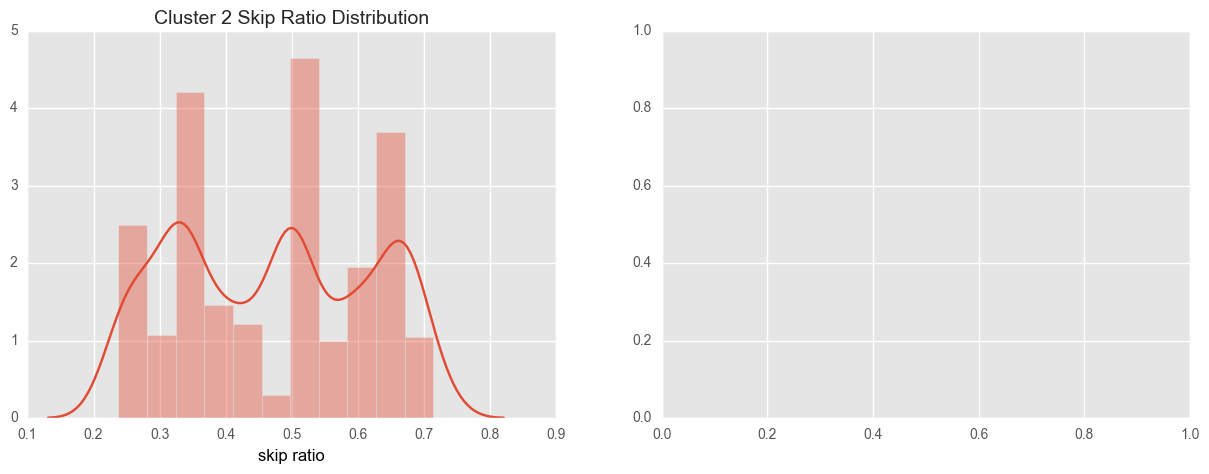

In [197]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

df_processed_cluster0 = df_processed[df_processed['Cluster_Class'] == 0]
c0 = sns.distplot(df_processed_cluster0['avg_incomplete'], ax=axs[0])
c0.axes.set_title('Cluster 0 Skip Ratio Distribution', fontsize=14)
c0.set_xlabel("skip ratio",color="black")

df_processed_cluster1 = df_processed[df_processed['Cluster_Class'] == 1]
c1 = sns.distplot(df_processed_cluster1['avg_incomplete'], ax=axs[1])
c1.axes.set_title('Cluster 1 Skip Ratio Distribution', fontsize=14)
c1.set_xlabel("skip ratio",color="black")

df_processed_cluster2 = df_processed[df_processed['Cluster_Class'] == 2]
c2 = sns.distplot(df_processed_cluster2['avg_incomplete'],ax=axs2[0])
c2.axes.set_title('Cluster 2 Skip Ratio Distribution', fontsize=14)
c2.set_xlabel("skip ratio",color="black")

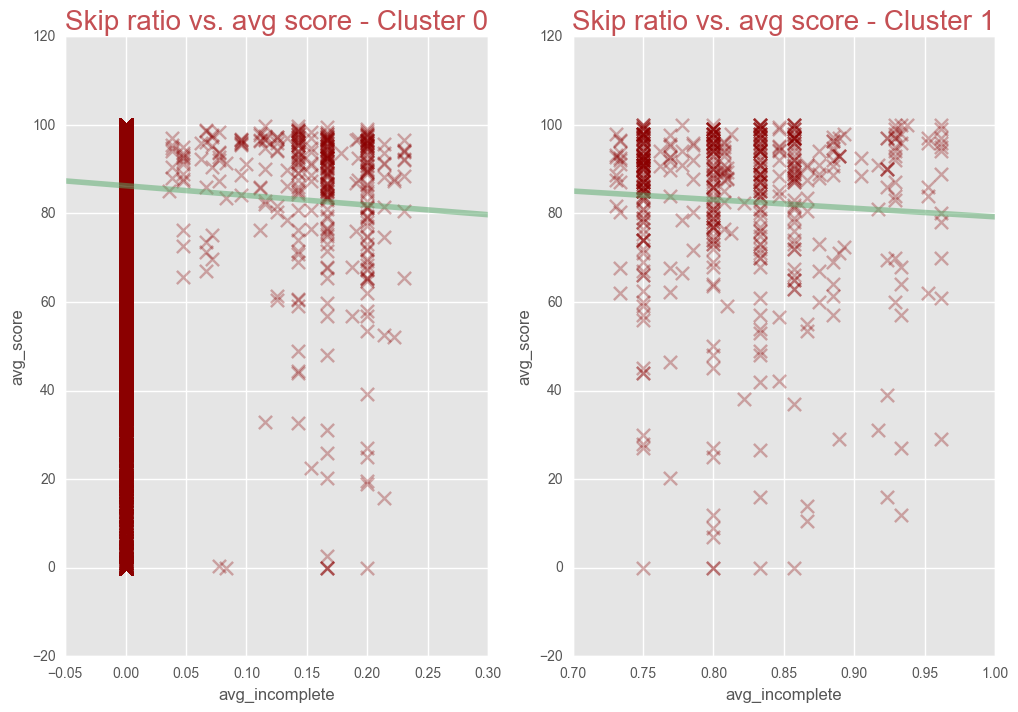

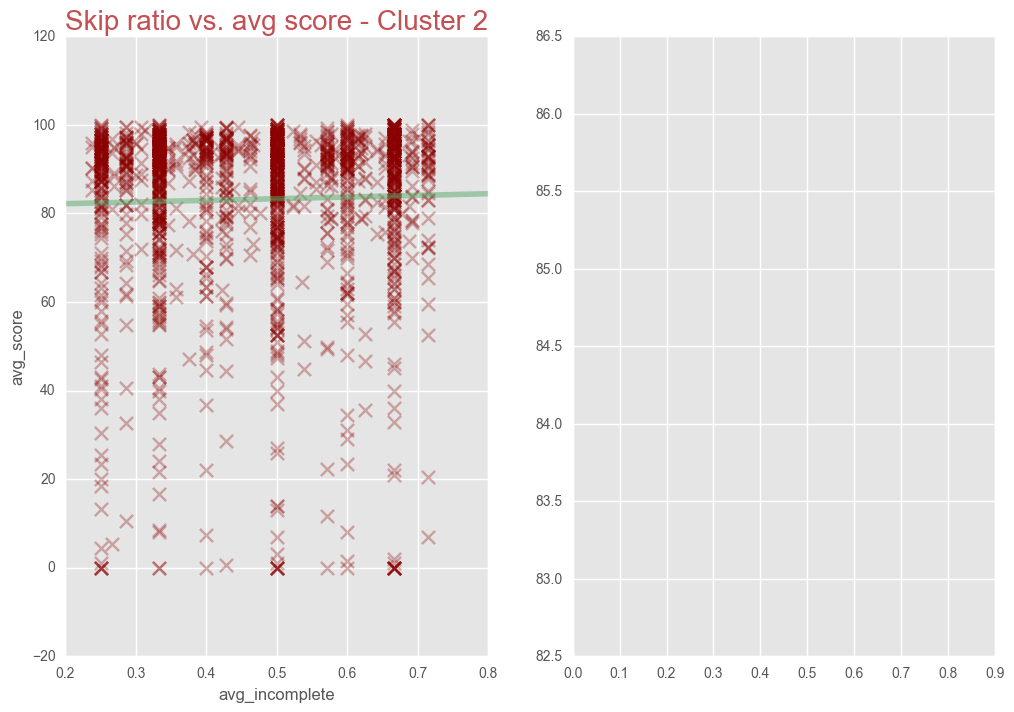

In [114]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

x0=df_processed_cluster0['avg_incomplete']
y0=df_processed_cluster0['avg_score']
g = sns.regplot(x=x0, y=y0, data=df_processed_cluster0, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs[0])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg score - Cluster 0', fontsize=20,color="r")

x1=df_processed_cluster1['avg_incomplete']
y1=df_processed_cluster1['avg_score']
g = sns.regplot(x=x1, y=y1, data=df_processed_cluster1, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs[1])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg score - Cluster 1', fontsize=20,color="r")

x2=df_processed_cluster2['avg_incomplete']
y2=df_processed_cluster2['avg_score']
g = sns.regplot(x=x2, y=y2, data=df_processed_cluster2, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs2[0])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg score - Cluster 2', fontsize=20,color="r")

In [235]:
df_processed.corr()["avg_incomplete"]

avg_incomplete       1.000000
avg_score           -0.035966
avg_words_saved     -0.162922
num_words_saved     -0.096567
postId               0.080527
user                 0.051943
video_vocab_count    0.100112
Cluster_Class        0.799866
Name: avg_incomplete, dtype: float64

In [115]:
df_processed_cluster0.corr()["avg_incomplete"]

avg_incomplete       1.000000
avg_score           -0.017779
avg_words_saved      0.006425
num_words_saved      0.068647
postId              -0.020870
user                 0.006564
video_vocab_count    0.115274
Cluster_Class             NaN
Name: avg_incomplete, dtype: float64

In [116]:
df_processed_cluster1.corr()["avg_incomplete"]

avg_incomplete       1.000000
avg_score           -0.058616
avg_words_saved     -0.195369
num_words_saved     -0.399103
postId               0.119584
user                -0.003091
video_vocab_count   -0.232749
Cluster_Class             NaN
Name: avg_incomplete, dtype: float64

In [161]:
df_processed_cluster2.corr()["avg_incomplete"]

avg_incomplete       1.000000
avg_score            0.027848
avg_words_saved     -0.017258
num_words_saved     -0.008180
postId              -0.091213
user                -0.010785
video_vocab_count    0.088618
Cluster_Class             NaN
Name: avg_incomplete, dtype: float64

In [168]:
df_processed_cluster2.groupby(['postId','user']).size()

postId  user  
50      51936     1
        53496     1
        58113     1
        58550     1
        58953     1
        61553     1
        68274     1
        71166     1
        89913     1
        90421     1
        90679     1
        130150    1
2093    39760     1
        52920     1
        58402     1
        66467     1
        85636     1
3585    800       1
        25010     1
        29761     1
        31026     1
        51832     1
        53576     1
        53740     1
        54728     1
        60454     1
        62544     1
        63218     1
        63410     1
        63591     1
        64955     1
        65953     1
        66223     1
        67500     1
        67934     1
        75877     1
        77052     1
        78167     1
        81157     1
        86037     1
        86923     1
        87173     1
        87273     1
        89471     1
        91473     1
        91662     1
        93339     1
        94171     1
        94824     1
     

In [155]:
df_processed_cluster2[df_processed_cluster2['user']==118204]

,avg_incomplete,avg_score,avg_words_saved,num_words_saved,postId,user,video_vocab_count,Cluster_Class
35508,0.666667,67.0,0.0,0,9851,118204,143,2
